# Grupowanie państw na podstawie wyglądu ich flag
## Rafał Gulewski, Marek Nowakowski
### Projekt zespołowy - podstawy reprezentacji i analizy danych

Wczytanie niezbędnych pakietów.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.	Przedstawienie informacji o zbiorze danych (opis atrybutów)

In [2]:
#wczytywanie danych
df = pd.read_csv("flag.data",  
                 names =['Name','Landmass', 'Zone','Area','Population','Language','Religion','Bars',
                 'Stripes','Colours','Red','Green','Blue','Gold','White','Black','Orange','Mainhue',
                 'Circles','Crosses','Saltires','Quarters','Sunstars','Crescent','Triangle','Icon',
                 'Animate','Text','Topleft','Botright'], index_col = 0)

#Słownik kolorów
COLOR_MAP = {"red": 1, "blue": 2, "green": 3, "white": 4, "gold": 5, "black": 6, "orange": 7, "brown": 8}    

#zamiana wartości na wartości liczbowe
df['Mainhue'] = df['Mainhue'].map(COLOR_MAP)
df['Topleft'] = df['Topleft'].map(COLOR_MAP)
df['Botright'] = df['Botright'].map(COLOR_MAP)

#zmiana typu danych w ramce
df.Mainhue = df.Mainhue.apply(int)
df.Topleft = df.Topleft.apply(int)
df.Botright = df.Botright.apply(int)

#przedstawienie danych
df

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,6,3
Albania,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,1,1
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,3,4
American-Samoa,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,2,1
Andorra,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Samoa,6,3,3,0,1,1,0,0,3,1,...,0,1,5,0,0,0,0,0,2,1
Yugoslavia,3,1,256,22,6,6,0,3,4,1,...,0,0,1,0,0,0,0,0,2,1
Zaire,4,2,905,28,10,5,0,0,4,1,...,0,0,0,0,0,1,1,0,3,3


In [3]:
#Sprawdzenie braków w danych
df.isnull().sum()

Landmass      0
Zone          0
Area          0
Population    0
Language      0
Religion      0
Bars          0
Stripes       0
Colours       0
Red           0
Green         0
Blue          0
Gold          0
White         0
Black         0
Orange        0
Mainhue       0
Circles       0
Crosses       0
Saltires      0
Quarters      0
Sunstars      0
Crescent      0
Triangle      0
Icon          0
Animate       0
Text          0
Topleft       0
Botright      0
dtype: int64

2.	Analiza zbioru ze względu na występowanie danych atrybutów. (ilość wystąpień, średnia itd..)

Text(0.5, 1.0, 'Countries count by religion')

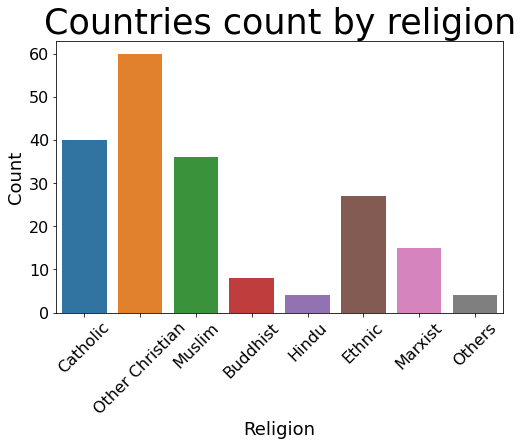

In [4]:
#Wykres kolumnowy ilości państw w danej religii
xticks = list(range(8))
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu','Ethnic', 'Marxist', 'Others']

plt.figure(figsize = (8, 5))
ax = sns.countplot(df['Religion'])
plt.xlabel('Religion', size = 18)
plt.ylabel('Count', size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(religions, minor=False, rotation = 45)
plt.title('Countries count by religion', size = 35)

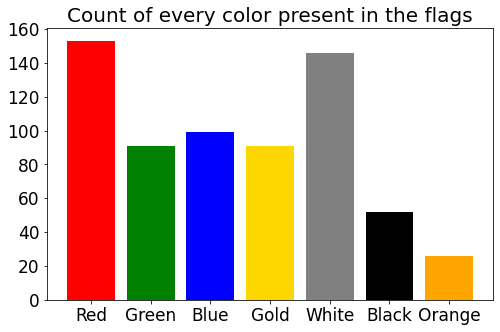

In [5]:
#wykres kolumnowy liczby danego koloru na flagach
color = ['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']
colorGraf = ['Red', 'Green', 'Blue', 'Gold', 'Gray', 'Black', 'Orange']
color_count = []


for col in color:
    color_count.append(sum(df[col] == 1))

plt.figure(figsize = (8, 5))
plt.bar(color, color_count, color = colorGraf)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.title('Count of every color present in the flags', size = 20)
plt.show()

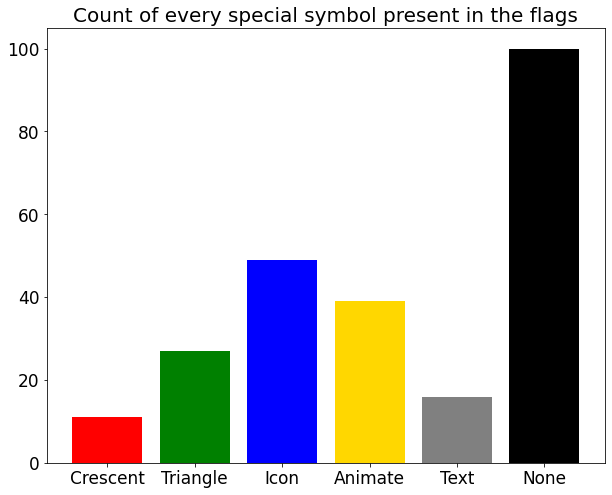

In [6]:
#występowanie specjalnych symboli na flagach
symbols = ['Crescent', 'Triangle', 'Icon', 'Animate', 'Text', 'None']
flagSymbols = df
symbolsCount = pd.DataFrame([[0,0,0,0,0,0]], columns = symbols)

for index, row in flagSymbols.iterrows():
    checker = True
    for symbol in symbols:
        if(symbol != 'None'):
            if(row[symbol] == 1):
                symbolsCount[symbol][0] += 1
                checker = False
        else:
            if(checker):
                symbolsCount[symbol][0] += 1

plt.figure(figsize = (10, 8))
plt.bar(symbols, symbolsCount.loc[0], color = colorGraf)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.title('Count of every special symbol present in the flags', size = 20)
plt.show()
    

3.	Przedstawienie zależności między atrybutami

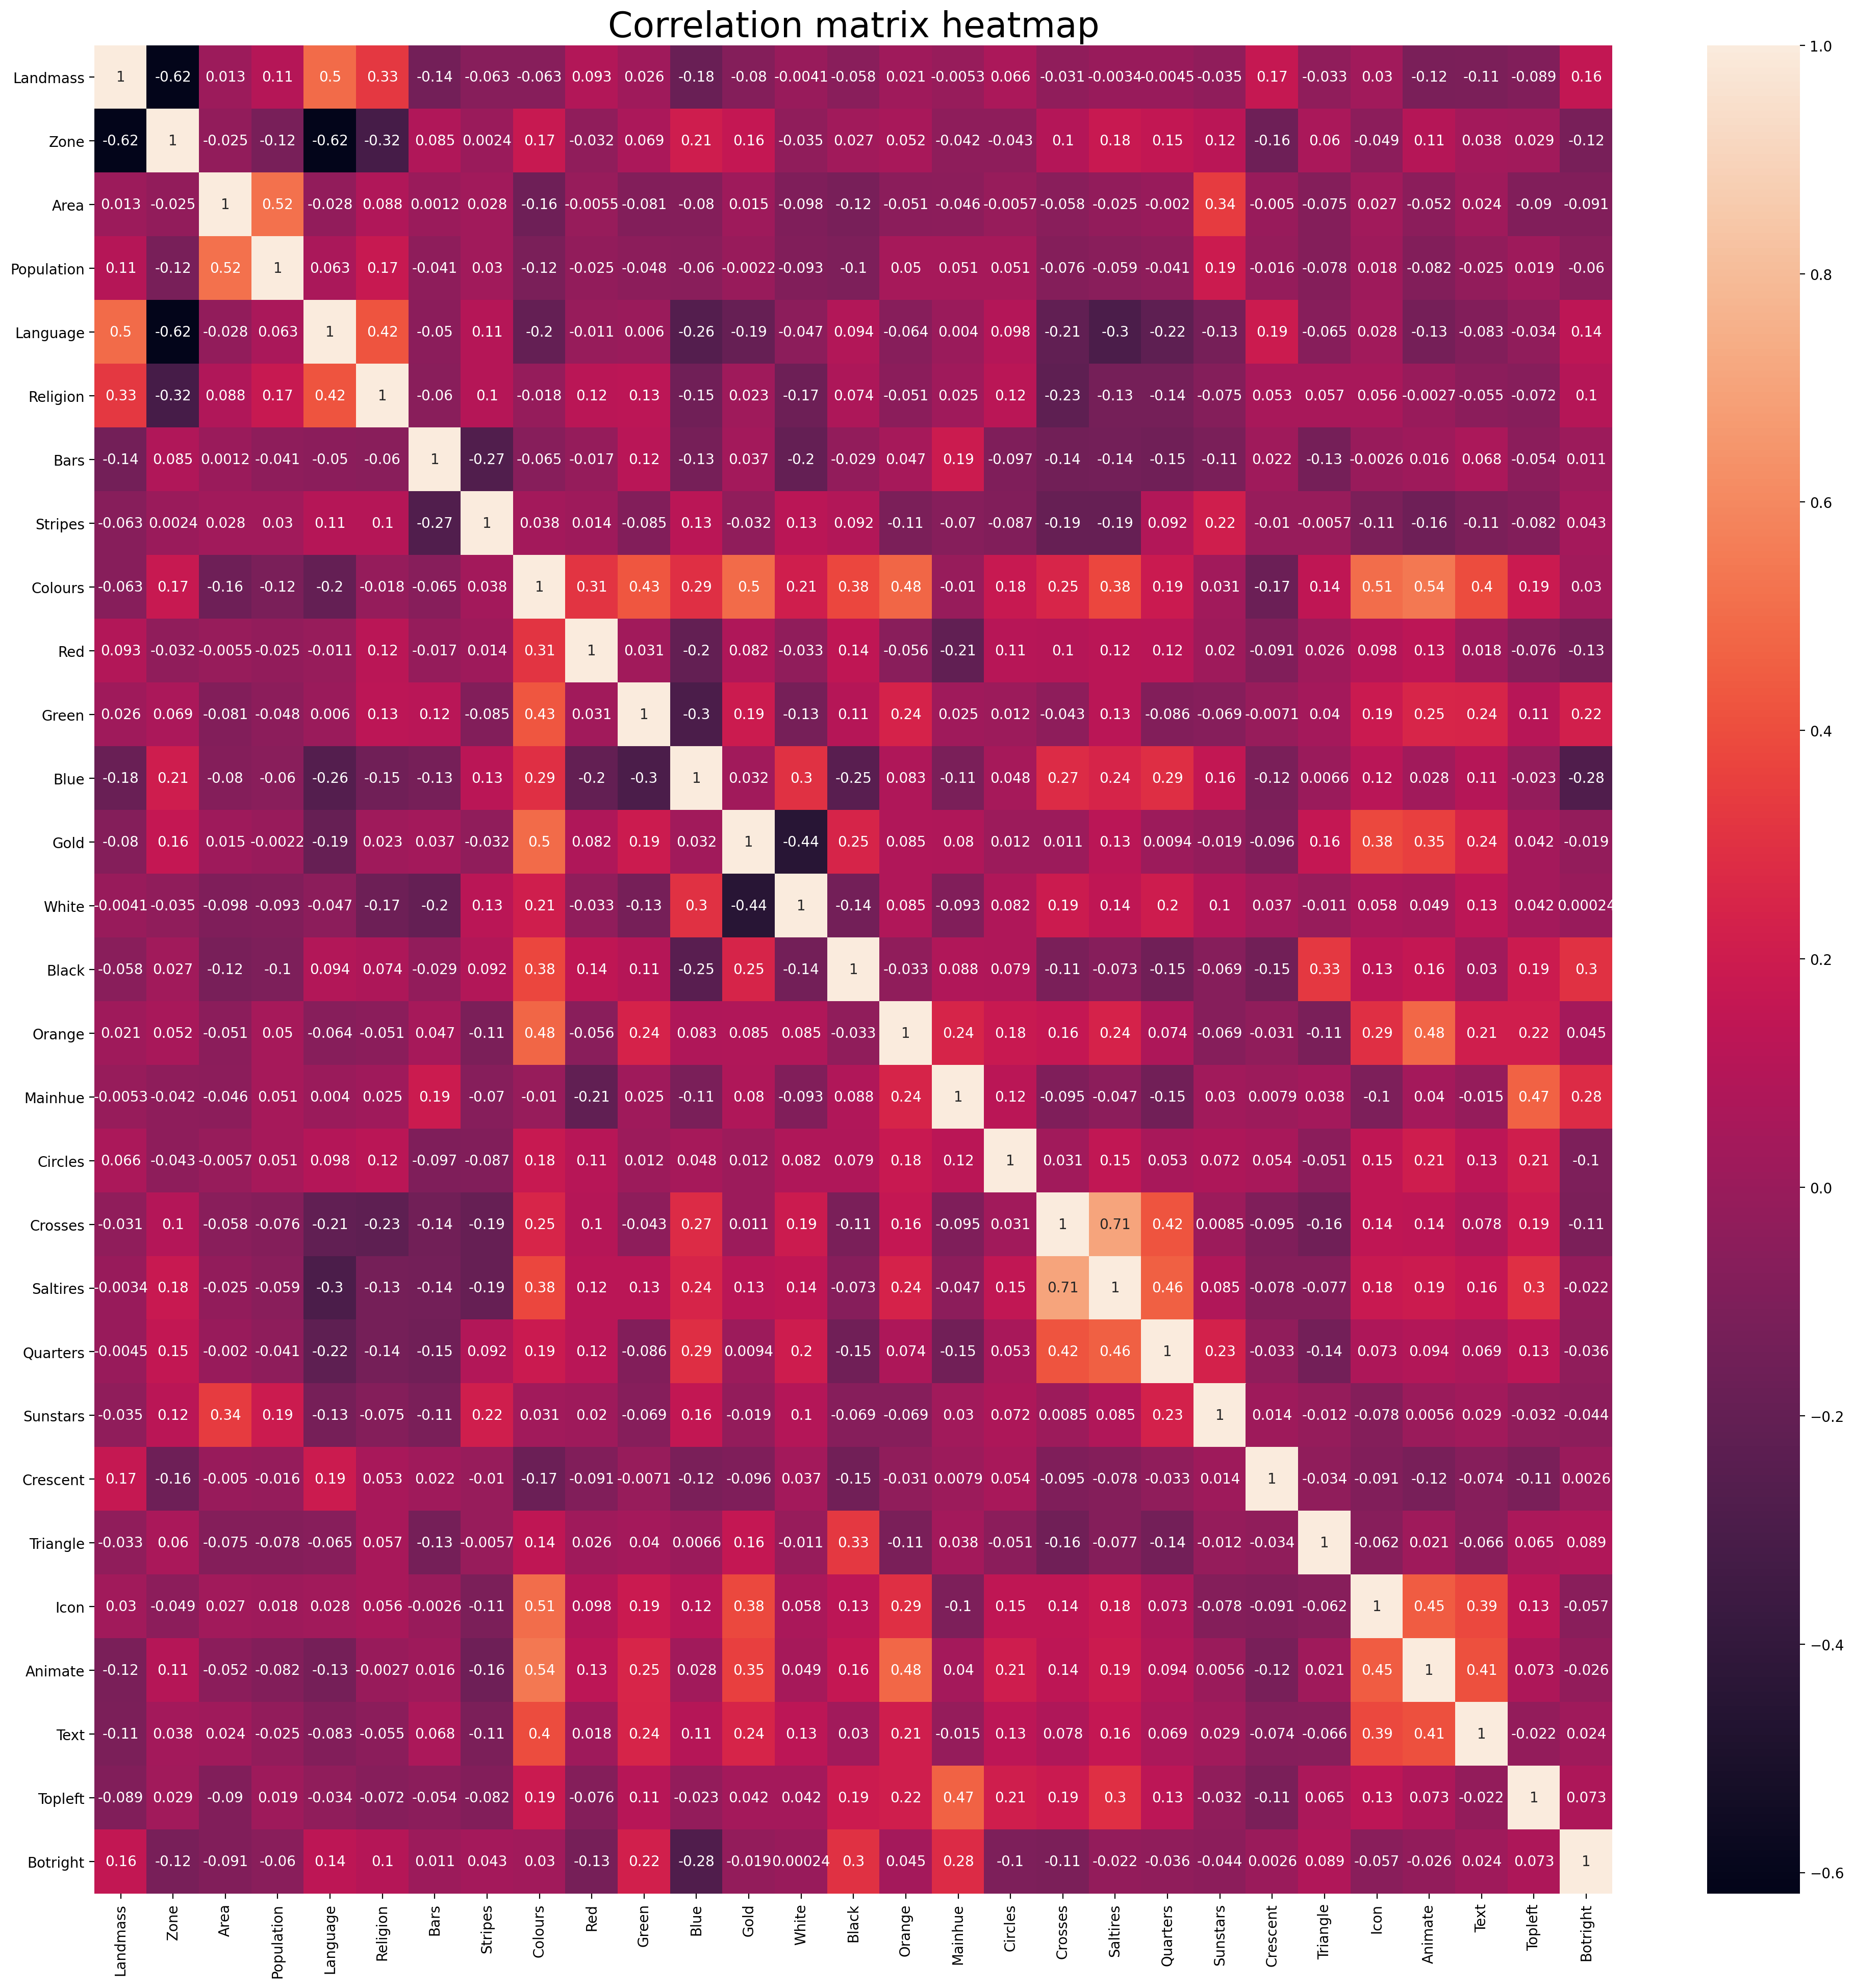

In [7]:
#Pairplot jest w tym przypadku mało czytelny - zbyt wiele atrybutów powoduje mały rozmiar pojedyńczego wykresu 
#przy bardzo dużym rozmiarze macierzy oraz długi czas wczytywania.
#sns.pairplot(df, kind="scatter")
#Użyjemy więc macieży korelacji w postaci mapy ciepła
plt.figure(figsize=(24,24),dpi = 200)
sns.heatmap(df.corr(),annot = df.corr())
plt.title('Correlation matrix heatmap', size = 25)
plt.show()

4.	Klasyfikacja i dobór atrybutów znaczących.

In [8]:
#Usunięcie zbędnych kolumn (nie związanych z flagami)
flagsDF = df.drop(["Zone","Area","Population","Language","Landmass"], 1)

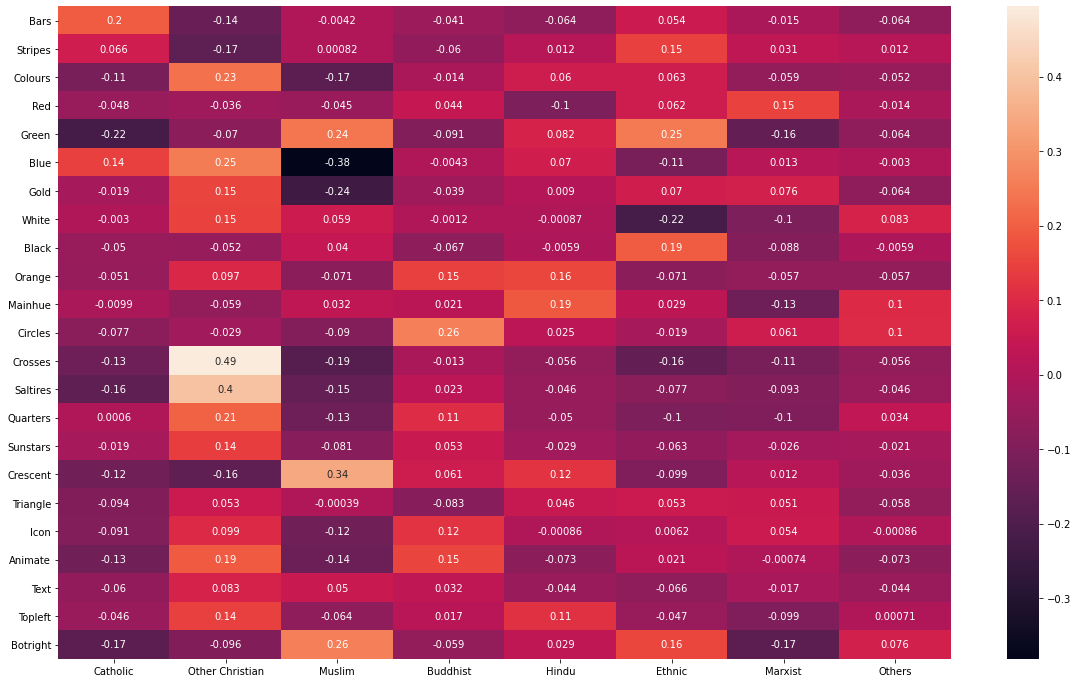

In [9]:
#Korelacja zmięnnych i religii panstw
corr_df = flagsDF
extra_columns = pd.get_dummies(corr_df["Religion"])
extra_columns = extra_columns.rename(columns ={ 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"})
corr_df = pd.merge(corr_df, extra_columns, left_index=True, right_index=True, how="inner")

corr_df = corr_df.drop(["Religion"], 1)
Var_Corr = corr_df.corr().filter(extra_columns).drop(extra_columns)

fig = plt.figure(figsize=(20,12))
sns.heatmap(Var_Corr, xticklabels = Var_Corr.columns, yticklabels = Var_Corr.index, annot=True)



5.	Porównanie sposobów grupowania i uzyskanych wyników.

In [10]:
# import niezbędnych procedur pakietu scipy i scikit.learn
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, log_loss

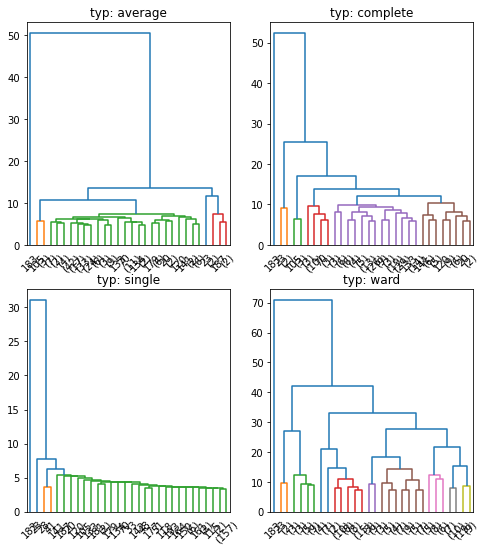

In [11]:
#grupowanie hierarchiczne
flags = flagsDF.drop(['Religion'], 1)
prog_proc = 20

plt.figure(figsize=(8, 9))
#dendrogramy
for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
    grupy = linkage(flags, method = typ_odleglosci, metric = 'euclidean')
    prog = prog_proc*max(grupy[:,2])/100
    plt.subplot(2,2,index + 1)
    cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
    plt.title('typ: ' + typ_odleglosci)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

In [13]:
#klasyfikatory
classifiers = [
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=9),
    NearestCentroid(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=9),
    DecisionTreeClassifier(max_depth=11),
    DecisionTreeClassifier(max_depth=13),
    LinearRegression(),
    
]

#przygotowanie zbiorów
X = flags
Y = flagsDF.Religion

In [20]:
#podzielenie na 2 zbiory bez losowości podziału
def podzielNaZbioryNieLosowo():
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=0.4, shuffle=False)
    return{"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

#podział na 2 zbiory z elementem losowości
def podzielNaZbioryLosowo():
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=0.4)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [14]:
#wyświetlenie wyników weryfikacji klasyfikatorów
def weryfikuj(model,dane):
    model.fit(dane["opis_ucz"], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"])
    wynik_test = model.predict(dane["opis_test"])
    return (model.score(dane["opis_ucz"], dane["dec_ucz"]), model.score(dane["opis_test"], dane["dec_test"]))

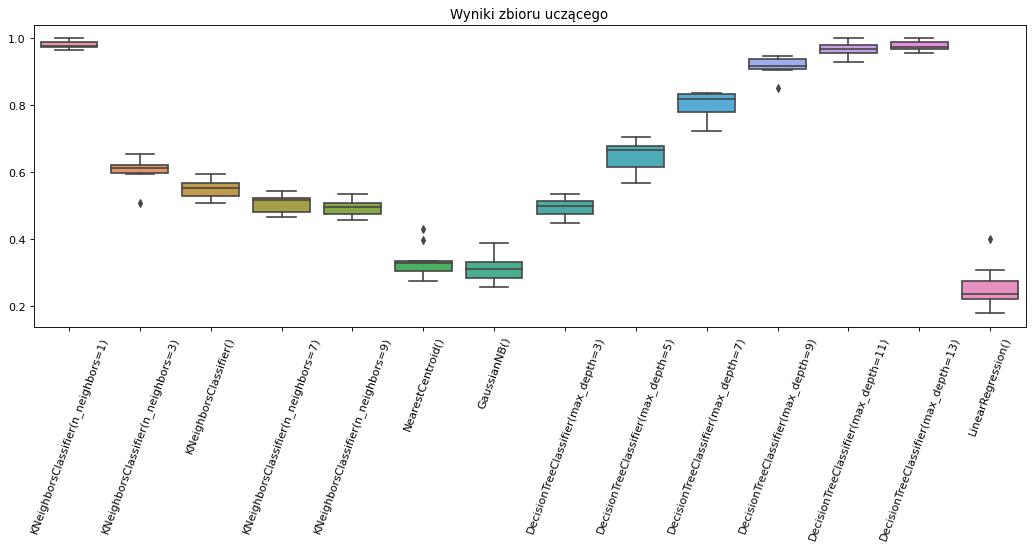

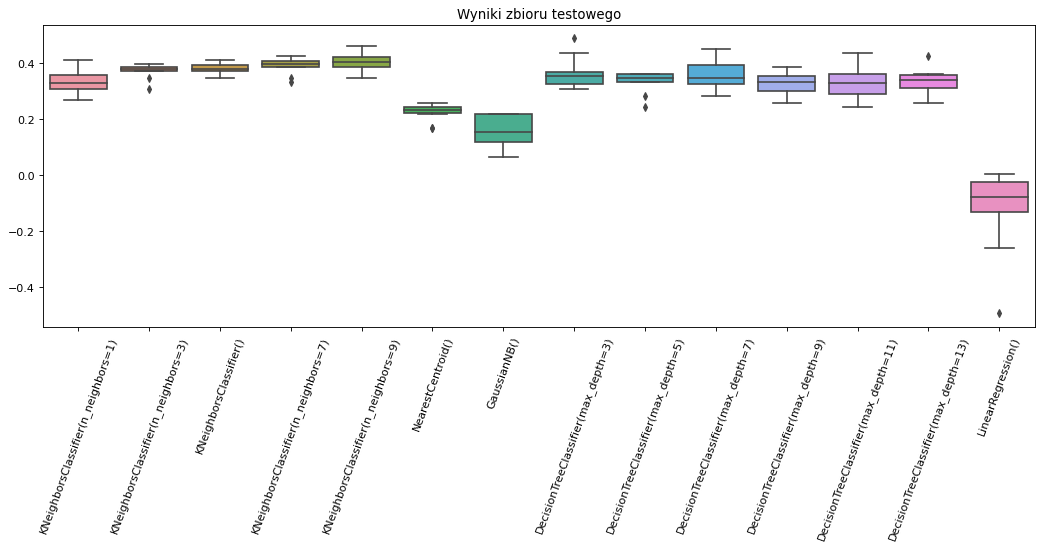

In [21]:
#weryfikacja klasyfikatorów losowy podział na grupy
wynikiKlasyfikacjiUcz = pd.DataFrame( index=range(10), columns=classifiers )
wynikiKlasyfikacjiTest = pd.DataFrame( index=range(10), columns=classifiers )

for i in range(10):
    dane = podzielNaZbioryLosowo()
    for model in classifiers:
        tmp = weryfikuj(model, dane)
        wynikiKlasyfikacjiUcz[model][i] = tmp[0]
        wynikiKlasyfikacjiTest[model][i] = tmp[1]

plt.figure(figsize=(16,5), dpi= 80)
sns.boxplot(data=wynikiKlasyfikacjiUcz)
plt.title("Wyniki zbioru uczącego")
plt.tick_params(axis='x', rotation=70) 
plt.show()        
plt.figure(figsize=(16,5), dpi= 80)
sns.boxplot(data=wynikiKlasyfikacjiTest)
plt.title("Wyniki zbioru testowego")
plt.tick_params(axis='x', rotation=70) 
plt.show()   

In [22]:
#weryfikacja klasyfikatorów nielosowy podział na grupy
dane = podzielNaZbioryNieLosowo()
for model in classifiers:
    tmp = weryfikuj(model, dane)
    print("wynik dla modelu: " + (str)(model))
    print('Train score:', tmp[0])
    print('Test score:', tmp[1], "\n")
    

wynik dla modelu: KNeighborsClassifier(n_neighbors=1)
Train score: 0.9741379310344828
Test score: 0.3076923076923077 

wynik dla modelu: KNeighborsClassifier(n_neighbors=3)
Train score: 0.5258620689655172
Test score: 0.3076923076923077 

wynik dla modelu: KNeighborsClassifier()
Train score: 0.5517241379310345
Test score: 0.34615384615384615 

wynik dla modelu: KNeighborsClassifier(n_neighbors=7)
Train score: 0.47413793103448276
Test score: 0.34615384615384615 

wynik dla modelu: KNeighborsClassifier(n_neighbors=9)
Train score: 0.45689655172413796
Test score: 0.3717948717948718 

wynik dla modelu: NearestCentroid()
Train score: 0.31896551724137934
Test score: 0.16666666666666666 

wynik dla modelu: GaussianNB()
Train score: 0.29310344827586204
Test score: 0.15384615384615385 

wynik dla modelu: DecisionTreeClassifier(max_depth=3)
Train score: 0.46551724137931033
Test score: 0.4230769230769231 

wynik dla modelu: DecisionTreeClassifier(max_depth=5)
Train score: 0.6120689655172413
Test sc

In [23]:
#najlepszy model na podstawie punktacji testu
model =  DecisionTreeClassifier(max_depth=13)
dane = podzielNaZbioryLosowo()
model.fit(dane["opis_ucz"], dane["dec_ucz"])

wynik_ucz = model.predict(dane["opis_ucz"])
wynik_test = model.predict(dane["opis_test"])

print("wynik dla modelu: " + (str)(model))
print("Macierz pomyłek dla zbioru uczącego")
print(pd.crosstab(dane["dec_ucz"], wynik_ucz)) 
print("Macierz pomyłek dla zbioru testowego")
print(pd.crosstab(dane["dec_test"], wynik_test)) 
print('Train score:',model.score(dane["opis_ucz"], dane["dec_ucz"]))
print('Test score:',model.score(dane["opis_test"], dane["dec_test"]) , "\n")

wynik dla modelu: DecisionTreeClassifier(max_depth=13)
Macierz pomyłek dla zbioru uczącego
col_0      0   1   2  3  4   5  6  7
Religion                            
0         22   0   0  0  0   0  0  0
1          1  35   0  0  0   0  0  0
2          1   0  22  0  0   0  0  0
3          0   0   0  4  0   0  0  0
4          0   0   0  0  2   0  0  0
5          0   0   0  0  0  20  0  0
6          1   0   0  0  0   0  5  0
7          0   0   0  0  0   0  0  3
Macierz pomyłek dla zbioru testowego
col_0     0  1  2  3  5  6
Religion                  
0         8  4  4  0  1  1
1         4  9  2  4  4  1
2         0  0  7  0  6  0
3         0  1  2  0  0  1
4         1  1  0  0  0  0
5         2  2  0  2  1  0
6         3  1  3  1  0  1
7         0  0  1  0  0  0
Train score: 0.9741379310344828
Test score: 0.3333333333333333 



6.	Ocena wyników i sformułowanie wniosków.

In [24]:
wynik_u = dane["dec_ucz"]
for index, g in np.ndenumerate(wynik_ucz):
    dane["dec_ucz"][index[0]] = g
for index, g in np.ndenumerate(wynik_test):
    dane["dec_test"][index[0]] = g


#rozdzielenie wyników na grupy
wynik = dane["dec_ucz"].append(dane["dec_test"])
groups = matrix = [[] for i in range(8)]
for index, group in wynik.items():
    groups[group].append(index)

Procentowy rozkład religii w grupie 1:
Catholic   	 69.77%
Other Christian   	 11.63%
Muslim   	 2.33%
Buddhist   	 0.00%
Hindu   	 2.33%
Ethnic   	 4.65%
Marxist   	 9.30%
Others   	 0.00%
Procentowy rozkład religii w grupie 2:
Catholic   	 7.55%
Other Christian   	 83.02%
Muslim   	 0.00%
Buddhist   	 1.89%
Hindu   	 1.89%
Ethnic   	 3.77%
Marxist   	 1.89%
Others   	 0.00%
Procentowy rozkład religii w grupie 3:
Catholic   	 9.76%
Other Christian   	 4.88%
Muslim   	 70.73%
Buddhist   	 4.88%
Hindu   	 0.00%
Ethnic   	 0.00%
Marxist   	 7.32%
Others   	 2.44%
Procentowy rozkład religii w grupie 4:
Catholic   	 0.00%
Other Christian   	 36.36%
Muslim   	 0.00%
Buddhist   	 36.36%
Hindu   	 0.00%
Ethnic   	 18.18%
Marxist   	 9.09%
Others   	 0.00%
Procentowy rozkład religii w grupie 5:
Catholic   	 0.00%
Other Christian   	 0.00%
Muslim   	 0.00%
Buddhist   	 0.00%
Hindu   	 100.00%
Ethnic   	 0.00%
Marxist   	 0.00%
Others   	 0.00%
Procentowy rozkład religii w grupie 6:
Catholic   	

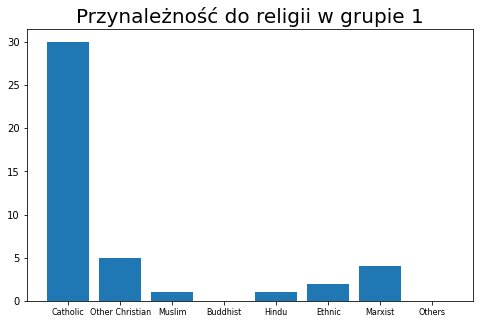

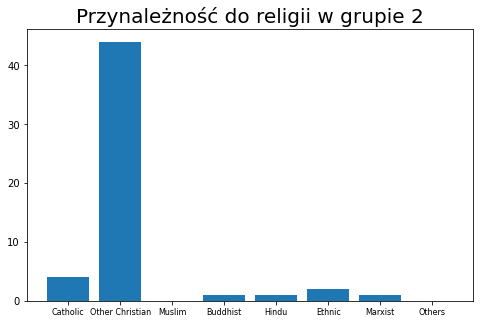

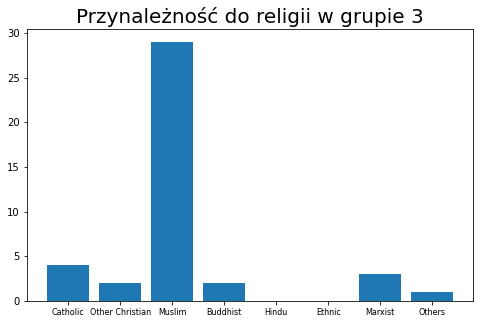

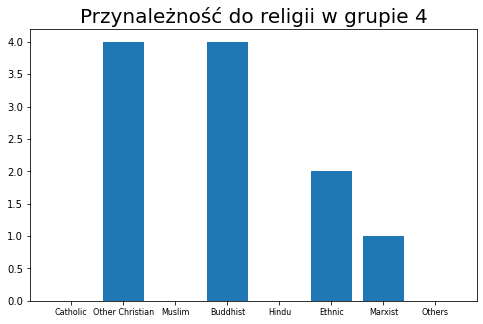

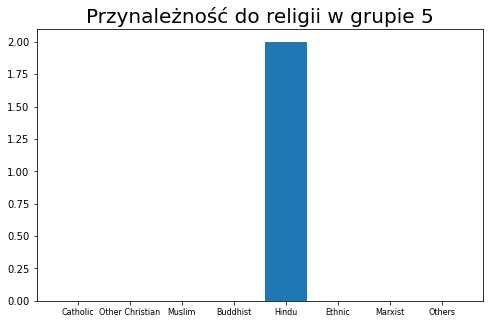

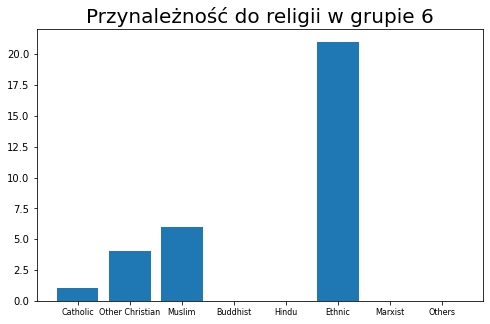

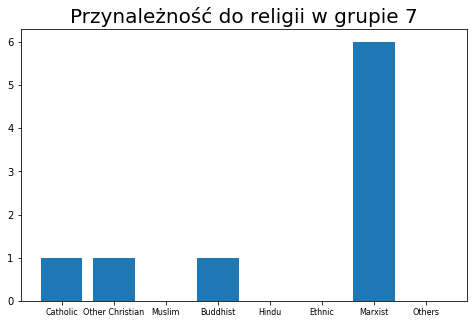

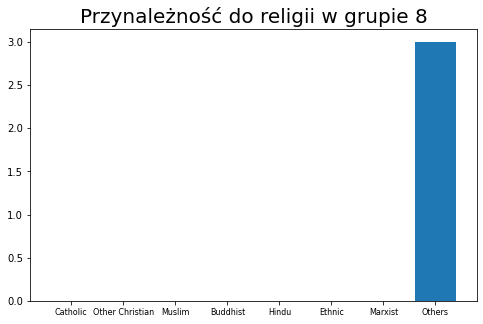

In [44]:
#Przynależność do religii w danej grupie
for index, group in enumerate(groups):
    religion = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
    religion_count = [0,0,0,0,0,0,0,0]
    sum = 0
    for x in group:
        sum += 1
        religion_count[ df['Religion'][x] ] += 1
    plt.figure(figsize = (8, 5))
    plt.bar(religion, religion_count)
    plt.xticks(size = 8)
    plt.yticks(size = 10)
    plt.title('Przynależność do religii w grupie ' + (str)(index + 1) , size = 20)
    print("Procentowy rozkład religii w grupie " + (str)(index + 1) + ":")
    for index, name in enumerate(religion):
        print(name + "   \t {:.2f}%".format(religion_count[index]/sum * 100) )
    plt.show()

7.	Wizualne przedstawienie wyników (grupy z ikonami flag danych państw).

In [26]:
import matplotlib.image as mpimg
from IPython.display import display, Image
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

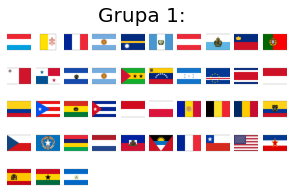

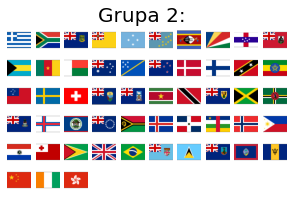

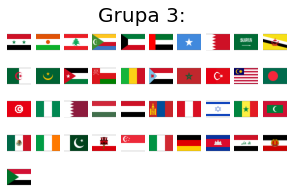

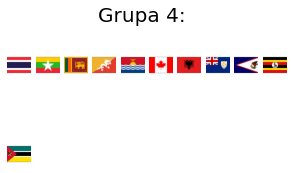

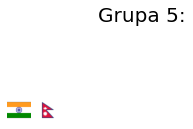

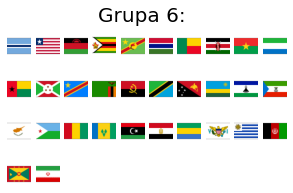

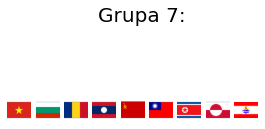

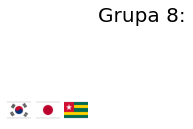

In [27]:
#graficzne pokazanie grupowania
def showImagesHorizontally(list_of_files, number):
    fig = figure(figsize=(5, 3))
    number_of_files = len(list_of_files)
    row = number_of_files/10 + 1

    if(row == 1):
        tmp = number
    else:
        tmp = 10

    for i in range(number_of_files):
        a=fig.add_subplot(row, tmp, i+1)
        name = 'flagicons/' + list_of_files[i] + '.png'
        image = imread(name)
        imshow(image,cmap='Greys_r')
        axis('off')
        title = "Grupa " + (str)(number + 1) + ":"
        fig.suptitle(title, fontsize=20)
    

for index, singleGroup in enumerate(groups):
    showImagesHorizontally(singleGroup, index)